## Import necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

## Right & center

In [3]:
img_right = cv2.imread('right.JPG',-1)
img_center = cv2.imread('center.JPG',-1)

#BGR
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
img_center = cv2.cvtColor(img_center, cv2.COLOR_BGR2RGB)

# Grayy scale
img_right_gray = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
img_center_gray = cv2.cvtColor(img_center, cv2.COLOR_BGR2GRAY)

In [4]:
# sift
sift = cv2.SIFT_create()
keypoints1, descriptor1 = sift.detectAndCompute(img_right_gray, None)
keypoints2, descriptor2 = sift.detectAndCompute(img_center_gray, None)

bf = cv2.BFMatcher()
matches =bf.knnMatch(descriptor1, descriptor2, k=2)

In [5]:
good = []

for m, n  in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

image1 = img_right.copy()
image2 = img_center.copy()

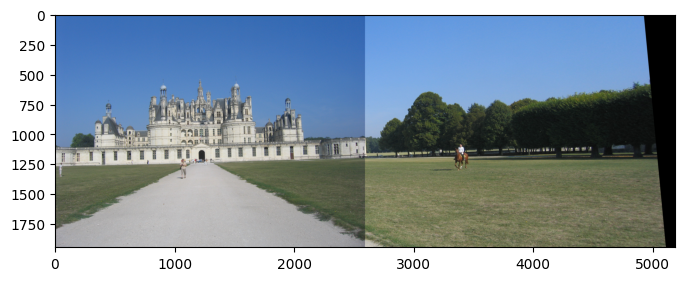

In [6]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good] ).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good] ).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h, w, _ = image1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst1 = cv2.perspectiveTransform(pts, M)

    dst1 = cv2.warpPerspective(image1, M, (image2.shape[1] + image1.shape[1], image2.shape[0]))
    dst1[0:image2.shape[0], 0:image2.shape[1]] = image2

    show_img_plt(dst1)

## left & (right+center)

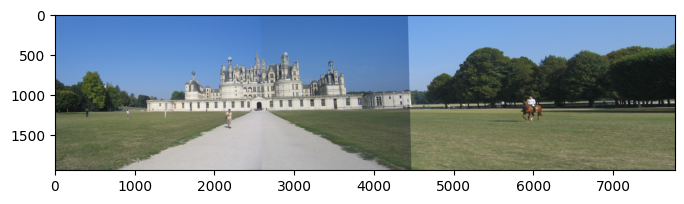

In [7]:
img_right = dst1
img_left = cv2.imread('left.JPG',-1)

img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)

img_right_gray = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
img_left_gray = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptor1 = sift.detectAndCompute(img_right_gray, None)
keypoints2, descriptor2 = sift.detectAndCompute(img_left_gray, None)

bf = cv2.BFMatcher()

matches =bf.knnMatch(descriptor1, descriptor2, k=2)

good = []

for m, n  in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

image1 = img_right.copy()
image2 = img_left.copy()

MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good] ).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good] ).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h, w, _ = image2.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    dst = cv2.warpPerspective(image1, M, (image2.shape[1] + image1.shape[1], image2.shape[0]))
    dst[0:image2.shape[0], 0:image2.shape[1]] = image2

    show_img_plt(dst)